***

***

<img src="https://www.crossed-flag-pins.com/animated-flag-gif/gifs/Vatican-City_240-animated-flag-gifs.gif"
style="width:490px; float: left; margin: 0 0px 0px 0px;"></img>

# Data Analysis on Catholic Population Around the World


The **Vatican City** officially the **Vatican City State** is the smallest independent state in the world and residence of the spiritual leadership of the Roman Catholic Church. Its territory is surrounded by the Italian capital city Rome, and priests and nuns of many nationalities make up almost all of the population

***



#### The dataset used in this analysis is from [Wikipedia](https://en.wikipedia.org/wiki/Catholic_Church_by_country)



***


# Data Preparation and Cleaning


### TODO

* install&import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import re

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
original_df=pd.read_csv('catholic-population.csv')

In [4]:
original_df.head()

,Country,Total population,% Catholic,Catholic total
0,Afghanistan ( details ),29928987,0.0003%,100
1,Albania ( details ),3020000,10% http://www.instat.gov.al/en/census/census-...,302000
2,Algeria ( details ),32531853,"0.14% Deeb, Mary Jane. ""Religious minorities"" ...",45000
3,Andorra ( details ),70000,88.2%,61740
4,Angola ( details ),31100000,41.1% -50% [https://2009-2017.state.gov/j/drl/...,"12,500,000-20,000,000"


***

* make a copy of original dataframe to preserve the original dataframe and proceed with modifying the new dataframe

In [5]:
df = original_df.copy()

***
* check to see if there are null values by using either .isna() or .isnull()

In [6]:
df.isnull().sum()

Country             0
Total population    0
% Catholic          0
Catholic total      0
dtype: int64

***
* rename columns for readability

In [7]:
df.columns

Index(['Country', 'Total population', '% Catholic', 'Catholic total'], dtype='object')

In [8]:
df.columns = ['Country','TotalPopulation', 'CatholicPercentagePerCountry', 'TotalCatholicPerCountry']
df.head()

,Country,TotalPopulation,CatholicPercentagePerCountry,TotalCatholicPerCountry
0,Afghanistan ( details ),29928987,0.0003%,100
1,Albania ( details ),3020000,10% http://www.instat.gov.al/en/census/census-...,302000
2,Algeria ( details ),32531853,"0.14% Deeb, Mary Jane. ""Religious minorities"" ...",45000
3,Andorra ( details ),70000,88.2%,61740
4,Angola ( details ),31100000,41.1% -50% [https://2009-2017.state.gov/j/drl/...,"12,500,000-20,000,000"


***
_'Country'_
* split data in column _'Country'_ using str.split() since _'Country'_ has an additional string attached '_(details)'_
* use str.replace(), str.lstrip() to remove spaces before the string and finally convert type to float

In [9]:
df['Country'] = df['Country'].str.replace('(details)', '').str.rstrip(' ()')
df.head()

,Country,TotalPopulation,CatholicPercentagePerCountry,TotalCatholicPerCountry
0,Afghanistan,29928987,0.0003%,100
1,Albania,3020000,10% http://www.instat.gov.al/en/census/census-...,302000
2,Algeria,32531853,"0.14% Deeb, Mary Jane. ""Religious minorities"" ...",45000
3,Andorra,70000,88.2%,61740
4,Angola,31100000,41.1% -50% [https://2009-2017.state.gov/j/drl/...,"12,500,000-20,000,000"


***
_'TotalCatholicPerCountry'_

* find all numeric values in each row then get the highest value in the list
* after cleaning, change datatype of _'TotalCatholicPerCountry'_ to float
* check the type of _'TotalCatholicPerCountry'_ then change to *int*

In [10]:
df.TotalCatholicPerCountry.dtype

dtype('O')

In [11]:
df.TotalCatholicPerCountry.unique()

array(['100', '302000', '45000', '61740', '12,500,000-20,000,000', '6930',
       '26,000,000 - 29,820,000', '29829', '5292000',
       '4,984,633 [https://www.katholisch.at/aktuelles/128508/knapp-5-millionen-katholiken-in-sterreich Knapp 5 Millionen Katholiken in Österreich] , Cathoic Church Austria',
       '2574', '39600', '71200', '110000', '10000', '674500', '6500000',
       '133600', '1984366', '1339', '7980000', '536333', '80365',
       '123,000,000 - 134,000,000 [http://g1.globo.com/mundo/noticia/2013/03/america-latina-abriga-40-dos-catolicos-do-mundo.html América Latina abriga 40% dos católicos do mundo] - 140,000,000 [https://www.gaudiumpress.org/content/24332-Mexico-e-o-segundo-pais-com-mais-catolicos-no-mundo--informam-dados-oficiais-mexicanos México é o segundo país com mais católicos no mundo, informam dados oficiais mexicanos] [https://catracalivre.com.br/viagem-livre/importancia-do-turismo-religioso-pelo-mundo/ A importância do turismo religioso pelo mundo]',
       '

In [12]:
#find all numeric data, remove the ',' then choose the highest number in the list
df['TotalCatholicPerCountry'] = df['TotalCatholicPerCountry'].str.findall('[0-9,]+')
df['TotalCatholicPerCountry'] = df['TotalCatholicPerCountry'].apply(lambda x: ', '.join([str(i) for i in x])).str.replace(',', '')
df.TotalCatholicPerCountry = df.TotalCatholicPerCountry.str.split(' ').apply(lambda x: max([int(i) for i in x[:8] if i]))
df.head()

,Country,TotalPopulation,CatholicPercentagePerCountry,TotalCatholicPerCountry
0,Afghanistan,29928987,0.0003%,100
1,Albania,3020000,10% http://www.instat.gov.al/en/census/census-...,302000
2,Algeria,32531853,"0.14% Deeb, Mary Jane. ""Religious minorities"" ...",45000
3,Andorra,70000,88.2%,61740
4,Angola,31100000,41.1% -50% [https://2009-2017.state.gov/j/drl/...,20000000


***
_'CatholicPercentagePerCountry'_
* **since this column would have several values from the original dataset, to minimize discrepancies, it is best to recalculate the percentage basing on the _'TotalPopulation'_ and '_TotalCatholicPerCountry'_**

In [13]:
df.CatholicPercentagePerCountry.unique()

array(['0.0003%',
       '10% http://www.instat.gov.al/en/census/census-2011/census-data.aspx latest albanian census, 2011',
       '0.14% Deeb, Mary Jane. "Religious minorities" Algeria (Country Study) . Federal Research Division, Library of Congress; Helen Chapan Metz, ed. December 1993. \'\'This article incorporates text from this source, which is in the public domain . [http://lcweb2.loc.gov/frd/cs/about.html]',
       '88.2%',
       '41.1% -50% [https://2009-2017.state.gov/j/drl/rls/irf/religiousfreedom/index.htm#wrapper International Religious Freedom Report for 2015 Angola] -56.4% -60%',
       '8.2%',
       '62.9% [http://www.ceil-conicet.gov.ar/wp-content/uploads/2019/11/ii25-2encuestacreencias.pdf Segunda Encuesta Nacional Sobre Creencias y Actitudes Religiosas en Argentina 2019] -63.3% [http://www.latinobarometro.org/latOnline.jsp Latinobarómetro (2018)] -66% -71%',
       '1%', '22.6%', '55.9%', '0.03%', '12%', '8.9%', '0.07%', '4.2%',
       '7.1%',
       '57.1% -58% [h

In [14]:
df['CatholicPercentagePerCountry'] = (df.TotalCatholicPerCountry/df.TotalPopulation)*100

In [15]:
df.head()

,Country,TotalPopulation,CatholicPercentagePerCountry,TotalCatholicPerCountry
0,Afghanistan,29928987,0.000334,100
1,Albania,3020000,10.000000,302000
2,Algeria,32531853,0.138326,45000
3,Andorra,70000,88.200000,61740
4,Angola,31100000,64.308682,20000000


***
* generate descriptive statistics for analysis
* verify if dataset has the required # of rows and columns _'(at least 3 columns and 150 rows)'_
* use df.shape or df.info()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       198 non-null    object 
 1   TotalPopulation               198 non-null    int64  
 2   CatholicPercentagePerCountry  198 non-null    float64
 3   TotalCatholicPerCountry       198 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 6.3+ KB


In [17]:
df.dtypes

Country                          object
TotalPopulation                   int64
CatholicPercentagePerCountry    float64
TotalCatholicPerCountry           int64
dtype: object

***
* after cleaning the data, merge lists of continents and countries by continents with the previous dataframe
* additional lists and dicts downloaded from website _(please see endnotes for credits)_
* manually add missing countries from world atlas list

In [18]:
africa = ['Algeria','Angola','Benin','Botswana','Burkina Faso','Burundi','Cameroon','Cabo Verde','Central African Republic','Chad','Comoros',
'Congo, Democratic Republic of','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea',
'Guinea-Bissau',"Côte d'Ivoire",'Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius',
'Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','São Tomé and Príncipe','Senegal','Seychelles','Sierra Leone',
'Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Western Sahara','Zambia','Zimbabwe']

asia = ['Afghanistan','Bahrain','Bangladesh','Bhutan','Brunei','Myanmar','Cambodia','China','East Timor','India','Indonesia',
'Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','Korea, North','Korea, South','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia',
'Maldives','Mongolia','Nepal','Oman','Pakistan','Palestine','Philippines','Qatar','Russia','Saudi Arabia','Singapore','Sri Lanka','Syria',
'Taiwan','Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen']

europe = ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria',
'Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','Georgia','Germany','Greece','Hungary',
'Iceland','Ireland','Italy','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','North Macedonia','Malta','Moldova','Monaco','Montenegro',
'Netherlands','Norway','Poland','Portugal','Romania','San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine',
'United Kingdom','Vatican City']

northamerica = [
'Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador',
'Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines',
'Trinidad and Tobago','United States']
    
oceania=['Australia','Fiji','Kiribati','Marshall Islands','Federated States of Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa',
'Solomon Islands','Tonga','Tuvalu','Vanuatu']

southamerica = ['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay',
'Venezuela']

continents = {'Africa': africa,'Asia': asia,'Europe': europe,'North America': northamerica,'Oceania': oceania,
              'South America': southamerica}


* check length of the list of countries

In [19]:
len(asia)+len(europe)+len(southamerica)+len(northamerica)+len(africa)+len(oceania)

197

* make a dataframe of the _'continents'_ dictionary and save as csv file by using the _'to_csv'_ function

In [20]:
cont = {}
cnt = 0
for key, value in continents.items():
    for x in value:
        cont[cnt] = [x,key]
        cnt +=1

In [21]:
continents_df = pd.DataFrame.from_dict(cont, orient='index', columns=['Country','Continent'])
continents_df.Country.head()

0         Algeria
1          Angola
2           Benin
3        Botswana
4    Burkina Faso
Name: Country, dtype: object

***
* **since the countries in continents_df and df are not of the same length, find out the missing countries and input the country and continent in the continents_df**
* check length|count of countries per continent

In [22]:
len(continents_df)

197

* check for missing Countries in the _'continents'_ list or duplicate instances of a country 

In [23]:
merged = df.merge(continents_df, how ='left', indicator=True)
merged[merged['_merge']=='left_only']

,Country,TotalPopulation,CatholicPercentagePerCountry,TotalCatholicPerCountry,Continent,_merge
38,"Congo, Republic of",5062021,47.602746,2409661,NaN,left_only
197,Total,7093798000,17.676370,1253926000,NaN,left_only


* **since there are 2 instances of the country _'Congo'_ one will be dropped**
* **the footer row will also be dropped**

In [24]:
df.loc[38]

Country                         Congo, Republic of
TotalPopulation                            5062021
CatholicPercentagePerCountry               47.6027
TotalCatholicPerCountry                    2409661
Name: 38, dtype: object

In [25]:
df[df.Country == 'Congo, Republic of']

,Country,TotalPopulation,CatholicPercentagePerCountry,TotalCatholicPerCountry
38,"Congo, Republic of",5062021,47.602746,2409661


In [26]:
df.drop(df[df.Country == 'Congo, Republic of'].index, inplace=True)
df.drop(index=197, inplace=True)

* **merge** main dataframe with _'continents_df'_

In [27]:
new_df = df.merge(continents_df, on='Country')

#### now the data is ready for plotting

***

# Exploratory Analysis and Visualization

### TODO

## What are the min(), max() and mean() of the table?

In [28]:
new_df.describe()

,TotalPopulation,CatholicPercentagePerCountry,TotalCatholicPerCountry
count,1.960000e+02,196.000000,1.960000e+02
mean,3.658200e+07,26.100852,5.766105e+06
std,1.401844e+08,29.575727,1.643828e+07
min,8.420000e+02,0.000334,8.000000e+01
25%,1.613314e+06,1.162500,3.728925e+04
50%,7.142053e+06,10.100000,3.231010e+05
75%,2.350000e+07,49.999973,3.705750e+06
max,1.400000e+09,100.000000,1.400000e+08


***
## What 20 countries have the highest Catholic Population Around the World

In [29]:
cath_df = new_df[['Country','TotalCatholicPerCountry','CatholicPercentagePerCountry','TotalPopulation', 'Continent']]

In [30]:
top_cath_pop = cath_df.sort_values(by=['TotalCatholicPerCountry'], ascending=False).head(20)
top_cath_pop_bg = top_cath_pop.set_index('Country')

#sets background color for the column being analyzed
top_cath_pop_bg.style.set_properties(**{'background-color': 'lightgray'}, subset=['TotalCatholicPerCountry'])


,TotalCatholicPerCountry,CatholicPercentagePerCountry,TotalPopulation,Continent
Country,,,,
Brazil,140000000,66.476733,210600000,South America
Mexico,100000000,79.051383,126500000,North America
Philippines,85470000,81.400000,105000000,Asia
United States,72600000,22.000000,330000000,North America
"Congo, Democratic Republic of",55800000,55.800000,100000000,Africa
Italy,50000000,82.236842,60800000,Europe
France,44000000,66.066066,66600000,Europe
Colombia,35000000,72.916667,48000000,South America
Poland,33000000,85.723192,38496000,Europe


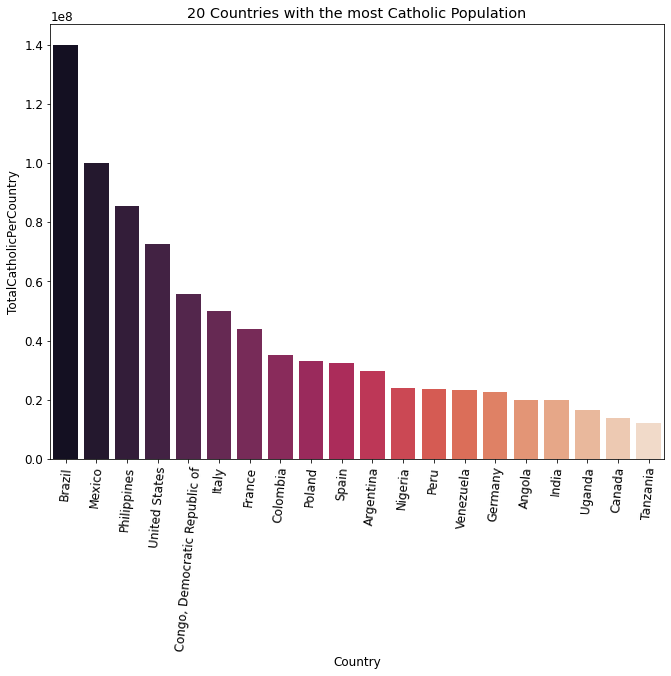

In [31]:
plt.figure(figsize=(11,8))
plt.rcParams.update({'font.size': 12})

#rotate labels 90 degrees
plt.xticks(rotation=85) 

#chart title
plt.title('20 Countries with the most Catholic Population')
sns.barplot(x = top_cath_pop.Country, y = top_cath_pop.TotalCatholicPerCountry, 
            palette='rocket');

> #### according the the chart, **Brazil** tops the world's Catholic Population with 66.5% of Catholics in that country 
>
> #### **Tanzania** making the top 20th position with 27.2% of Catholics.

***

## **From the chart above, which countries have TotalPopulations of 100,000,000 and up?**

In [32]:
top_cath_pop_of_100M = top_cath_pop[top_cath_pop.TotalPopulation >= 100000000]

#change the order of columns then sort by 'TotalPopulation'
new_top_cath_pop_of_100M = top_cath_pop_of_100M[['Country', 'TotalPopulation', 'TotalCatholicPerCountry', 'Continent']]
sort_by_tot_pop = new_top_cath_pop_of_100M.sort_values(by='TotalPopulation', ascending=False)
new_top_cath_pop_of_100M_bg = sort_by_tot_pop.set_index('Country')

#barcharts (highlighted rows) included in dataframes
new_top_cath_pop_of_100M_bg.style.bar(subset=['TotalPopulation', 'TotalCatholicPerCountry'], color='lightblue')

,TotalPopulation,TotalCatholicPerCountry,Continent
Country,,,
India,1280000000,19900000,Asia
United States,330000000,72600000,North America
Brazil,210600000,140000000,South America
Nigeria,190000000,23940000,Africa
Mexico,126500000,100000000,North America
Philippines,105000000,85470000,Asia
"Congo, Democratic Republic of",100000000,55800000,Africa


> #### as an example, you'll see in the _TotalPopulation_ column - India, United States and Brazil belonging to the countries with the highest population in the world in descending order (first barchart _lightblue highlight_) 
> #### the next columnt shows barchart rankings of Brazil, Mexico and Philippines.

***

#### conversely, we can get the 20 Countries with least number of Catholics
## **What Countries or Country have/has  the least Total Population of Catholics?**

In [33]:
least_catholic_countries = cath_df.sort_values(by=['TotalCatholicPerCountry'], ascending=True).head(20)
least_catholic_countries.sort_values(by=['TotalCatholicPerCountry'], ascending=True)
least_catholic_countries.set_index('Country')

,TotalCatholicPerCountry,CatholicPercentagePerCountry,TotalPopulation,Continent
Country,,,,
Maldives,80,0.022916,349106,Asia
Afghanistan,100,0.000334,29928987,Asia
Somalia,100,0.001164,8591629,Africa
Tuvalu,100,1.000000,10000,Oceania
Western Sahara,163,0.059705,273008,Africa
Turkmenistan,500,0.010526,4750000,Asia
Vatican City,842,100.000000,842,Europe
Djibouti,953,0.199915,476703,Africa
Tajikistan,1000,0.013960,7163506,Asia


#### or we can get the country with the least value by using _'nsmallest()'_ function

In [34]:
least_country = cath_df.nsmallest(1, "TotalCatholicPerCountry")
least_country

,Country,TotalCatholicPerCountry,CatholicPercentagePerCountry,TotalPopulation,Continent
106,Maldives,80,0.022916,349106,Asia


> #### _Maldives_ has the least number of Catholics
***

## Rank the Countries by  _'TotalCatholicPerCountry'_ and group by _'Continent'_

In [35]:
all_total_country = cath_df.groupby(['Continent', 'Country','TotalCatholicPerCountry']).sum()
all_total_country
all_total_country.sort_values(by=['Continent','TotalCatholicPerCountry'], ascending=[True,False])

CatholicPercentagePerCountry  \
Continent     Country                          TotalCatholicPerCountry                                 
Africa        Congo, Democratic Republic of    55800000                                    55.800000   
              Nigeria                          23940000                                    12.600000   
              Angola                           20000000                                    64.308682   
              Uganda                           16500000                                    39.285714   
              Tanzania                         12220689                                    27.200001   
              Cameroon                         9846000                                     38.399491   
              Kenya                            9613500                                     22.100000   
              Madagascar                       7890000                                     43.735315   
              Burundi                          7440000                                     62.000000   
              Côte d'Ivoire                    5093000                                     21.399160   
              Rwanda                           4807000                                     43.700000   
              Mozambique                       4618795                                     23.799998   
              South Sudan                      3950000                                     39.500000   
              Malawi                           3449487                                     28.370002   
              Zambia                           3003000                                     21.000000   
              South Africa                     2851327                                      6.429998   
              Ghana                            2712851                                     12.900000   
              Chad                             2520000                                     21.000000   
              Burkina Faso                     2367303                                     16.999998   
              Benin                            1984366                                     26.599991   
              Togo                             1499921                                     26.400000   
              Equatorial Guinea                1410000                                     87.037037   
              Lesotho                          1052237                                     50.906483   
              Zimbabwe                         982792                                       7.709993   
              Central African Republic         949974                                      24.999993   
              Gabon                            694600                                      49.999964   
              Ethiopia                         584426                                       0.800000   
              Cabo Verde                       395850                                      77.299959   
              Senegal                          389439                                       3.499999   
              Namibia                          344202                                      16.949986   
              Sudan                            300000                                       0.967742   
              Mauritius                        289314                                      23.509957   
              Guinea                           246164                                       2.599995   
              Mali                             189289                                       1.539996   
              Liberia                          188039                                       5.399989   
              Egypt                            187320                                       0.241685   
              Sierra Leone                     174511                                       2.899989   
              Er


#### above chart outputs the ranking of Countries by Total Number of Catholics per Country

## Do the same above by _'CatholicPercentagePerCountry'_ and group by _'Continent'_

In [36]:
percent_df = new_df[['Continent','Country','TotalPopulation','CatholicPercentagePerCountry']]
all_percent_country = percent_df.groupby(['Continent', 'Country', 'CatholicPercentagePerCountry']).sum()
all_percent_country.sort_values(by=['Continent','CatholicPercentagePerCountry'], ascending=[True,False])

TotalPopulation
Continent     Country                          CatholicPercentagePerCountry                 
Africa        Equatorial Guinea                87.037037                             1620000
              Cabo Verde                       77.299959                              512096
              Seychelles                       76.200000                               93000
              São Tomé and Príncipe            73.500000                              163000
              Angola                           64.308682                            31100000
              Burundi                          62.000000                            12000000
              Congo, Democratic Republic of    55.800000                           100000000
              Lesotho                          50.906483                             2067000
              Gabon                            49.999964                             1389201
              Madagascar                       43.735315                            18040341
              Rwanda                           43.700000                            11000000
              South Sudan                      39.500000                            10000000
              Uganda                           39.285714                            42000000
              Cameroon                         38.399491                            25640965
              Malawi                           28.370002                            12158924
              Tanzania                         27.200001                            44929002
              Benin                            26.599991                             7460025
              Togo                             26.400000                             5681519
              Central African Republic         24.999993                             3799897
              Mozambique                       23.799998                            19406703
              Mauritius                        23.509957                             1230602
              Kenya                            22.100000                            43500000
              Côte d'Ivoire                    21.399160                            23800000
              Chad                             21.000000                            12000000
              Zambia                           21.000000                            14300000
              Burkina Faso                     16.999998                            13925313
              Namibia                          16.949986                             2030692
              Ghana                            12.900000                            21029853
              Nigeria                          12.600000                           190000000
              Guinea-Bissau                    8.899972                              1416027
              Zimbabwe                         7.709993                             12746990
              South Africa                     6.429998                             44344136
              Swaziland                        5.709364                              1100000
              Liberia                          5.399989                              3482211
              Botswana                         4.899961                              1640115
              Senegal                          3.499999                             11126832
              Eritrea                          3.299983                              4561599
              Sierra Leone                     2.899989                              6017643
              Guinea                           2.599995                              9467866
              Gambia                           2.099976                              1593256
              Mali                             1.539996                             12291529
              Sudan                            0.967742                       

#### rankings of Countries with the Highest Percentage of Catholics per Country

***

#### Rank the Top 20 most Populated Countries in the World....

In [37]:
tot_pop_df = cath_df.sort_values(by='TotalPopulation', ascending=False).head(20)
top = tot_pop_df.set_index('Country')
top

,TotalCatholicPerCountry,CatholicPercentagePerCountry,TotalPopulation,Continent
Country,,,,
China,12000000,0.857143,1400000000,Asia
India,19900000,1.554688,1280000000,Asia
United States,72600000,22.000000,330000000,North America
Indonesia,7395000,2.900000,255000000,Asia
Brazil,140000000,66.476733,210600000,South America
Pakistan,1656000,0.800000,207000000,Asia
Nigeria,23940000,12.600000,190000000,Africa
Bangladesh,110000,0.069620,158000000,Asia
Russia,717101,0.500000,143420309,Asia


## Get the countries which are both in the list of 20 countries of Total Catholics per Country and top 20 most Populated Country; sort the result by Percentage of Catholics per Country and plot

In [38]:
top_cath_and_pop = top_cath_pop.merge(tot_pop_df, how ='left', indicator=True)
merged = top_cath_and_pop[top_cath_and_pop['_merge']=='both']

#drop column then set_index to Country
new_merged = merged.drop(['_merge'], axis=1).set_index('Country')
new_merged

,TotalCatholicPerCountry,CatholicPercentagePerCountry,TotalPopulation,Continent
Country,,,,
Brazil,140000000,66.476733,210600000,South America
Mexico,100000000,79.051383,126500000,North America
Philippines,85470000,81.400000,105000000,Asia
United States,72600000,22.000000,330000000,North America
"Congo, Democratic Republic of",55800000,55.800000,100000000,Africa
Nigeria,23940000,12.600000,190000000,Africa
Germany,22600000,27.196149,83100000,Europe
India,19900000,1.554688,1280000000,Asia


In [39]:
new_merged.sort_values(by='CatholicPercentagePerCountry', ascending=False)

,TotalCatholicPerCountry,CatholicPercentagePerCountry,TotalPopulation,Continent
Country,,,,
Philippines,85470000,81.400000,105000000,Asia
Mexico,100000000,79.051383,126500000,North America
Brazil,140000000,66.476733,210600000,South America
"Congo, Democratic Republic of",55800000,55.800000,100000000,Africa
Germany,22600000,27.196149,83100000,Europe
United States,72600000,22.000000,330000000,North America
Nigeria,23940000,12.600000,190000000,Africa
India,19900000,1.554688,1280000000,Asia


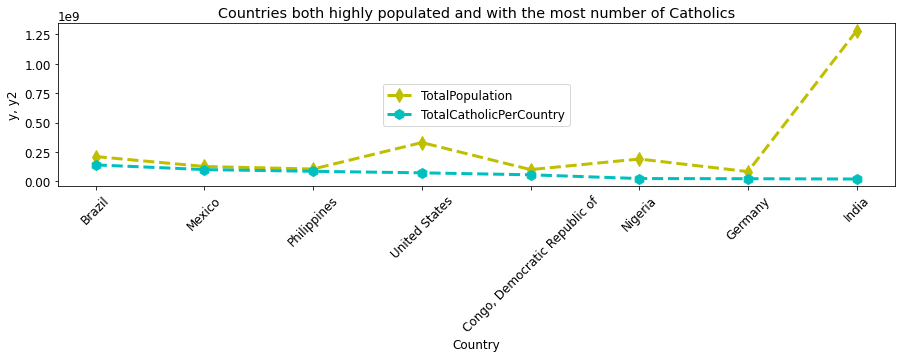

In [40]:
fig, ax = plt.subplots(figsize = (15,3))
plt.xticks(rotation=45)
plt.rcParams.update({'text.color' : 'black'})
ax.set_title('Countries both highly populated and with the most number of Catholics')
x = merged.Country
y = merged.TotalPopulation
y2 = merged.TotalCatholicPerCountry
ax.plot(x,y, 'yd--', label = 'TotalPopulation', linewidth = 3, markersize = 10)
ax.plot(x,y2, 'c--h', label = 'TotalCatholicPerCountry', linewidth = 3, markersize = 10)
ax.set_xlabel('Country')
ax.set_ylabel('y, y2')
ax.legend(loc = 10); #loc = int

#### the plot reveals that _Philippines_ has majority of  Catholic population in their country with 81.4% whereas _India_ only has 1.6% of Catholics but has the highest total population in the list

***

## What are the rankings by 'Continents' according to the Percentage of Catholics, Total Number of Catholics and Total Population?

#### by CatholicPercentagePerCountry

In [41]:
cont_df = new_df[['Continent','TotalCatholicPerCountry','TotalPopulation']]
percentage = cont_df.groupby(['Continent']).sum()

#calculate Catholic percentage per continent
percentage['CatholicPercentagePerContinent'] = (percentage.TotalCatholicPerCountry/percentage.TotalPopulation)* 100
percentage = percentage[['CatholicPercentagePerContinent','TotalCatholicPerCountry','TotalPopulation']]
continents = percentage
percentage_bg = percentage.sort_values(by='CatholicPercentagePerContinent', ascending=False)

#sets background color for the column being analyzed
percentage_bg.style.set_properties(**{'background-color': 'lightgray'}, subset=['CatholicPercentagePerContinent'])

,CatholicPercentagePerContinent,TotalCatholicPerCountry,TotalPopulation
Continent,,,
South America,69.350350,290640356,419089963
Europe,39.506146,244734083,619483572
North America,39.410015,226847241,575608110
Oceania,21.556641,8048188,37335075
Africa,19.761354,211277084,1069142778
Asia,3.339985,148609723,4449413161


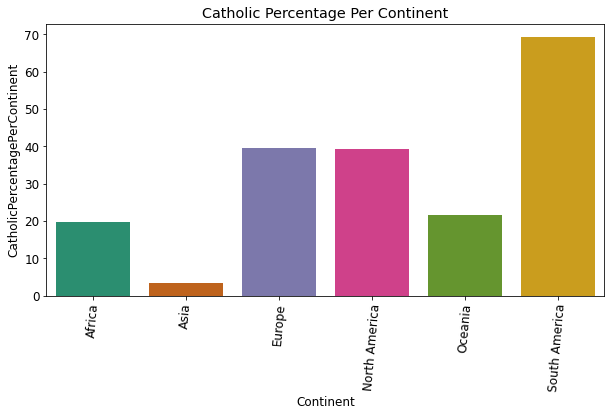

In [42]:
#CatholicPercentagePerContinent
plt.figure(figsize=(10,5))
plt.xticks(rotation=85) 
#chart title
plt.title('Catholic Percentage Per Continent')
sns.barplot(x = percentage.index, y ='CatholicPercentagePerContinent',  palette = 'Dark2', data = percentage);

> #### South America ranks 1st with almost 70% while Asia is at the bottom with 3.3%


#### by TotalPopulation

In [43]:
#TotalPopulation
total_pop = continents.groupby(['Continent']).sum()
total_pop_bg = total_pop.sort_values(by='TotalPopulation', ascending=False)
total_pop_bg.style.set_properties(**{'background-color': 'lightgray'}, subset=['TotalPopulation'])

,CatholicPercentagePerContinent,TotalCatholicPerCountry,TotalPopulation
Continent,,,
Asia,3.339985,148609723,4449413161
Africa,19.761354,211277084,1069142778
Europe,39.506146,244734083,619483572
North America,39.410015,226847241,575608110
South America,69.350350,290640356,419089963
Oceania,21.556641,8048188,37335075


<AxesSubplot:xlabel='Continent', ylabel='TotalPopulation'>

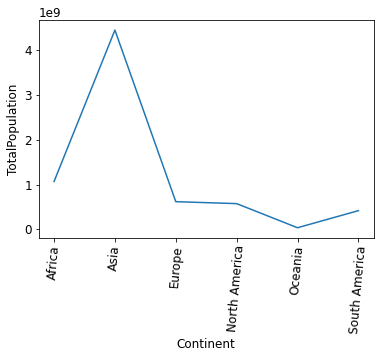

In [44]:
plt.xticks(rotation=85) 
sns.lineplot(x = total_pop.index, y = 'TotalPopulation', data = percentage)

#### by contrast, Asia now has the lead and Oceania having the lowest Total Population

#### by TotalCatholicPerCountry

In [45]:
#TotalCatholicPerCountry
total_cath = continents.groupby(['Continent']).sum()
total_cath_bg = total_cath.sort_values(by='TotalCatholicPerCountry', ascending=False)
total_cath_bg.style.set_properties(**{'background-color': 'lightgray'}, subset=['TotalCatholicPerCountry'])

,CatholicPercentagePerContinent,TotalCatholicPerCountry,TotalPopulation
Continent,,,
South America,69.350350,290640356,419089963
Europe,39.506146,244734083,619483572
North America,39.410015,226847241,575608110
Africa,19.761354,211277084,1069142778
Asia,3.339985,148609723,4449413161
Oceania,21.556641,8048188,37335075


## Represent all 3 results using a Donut Plot side by side

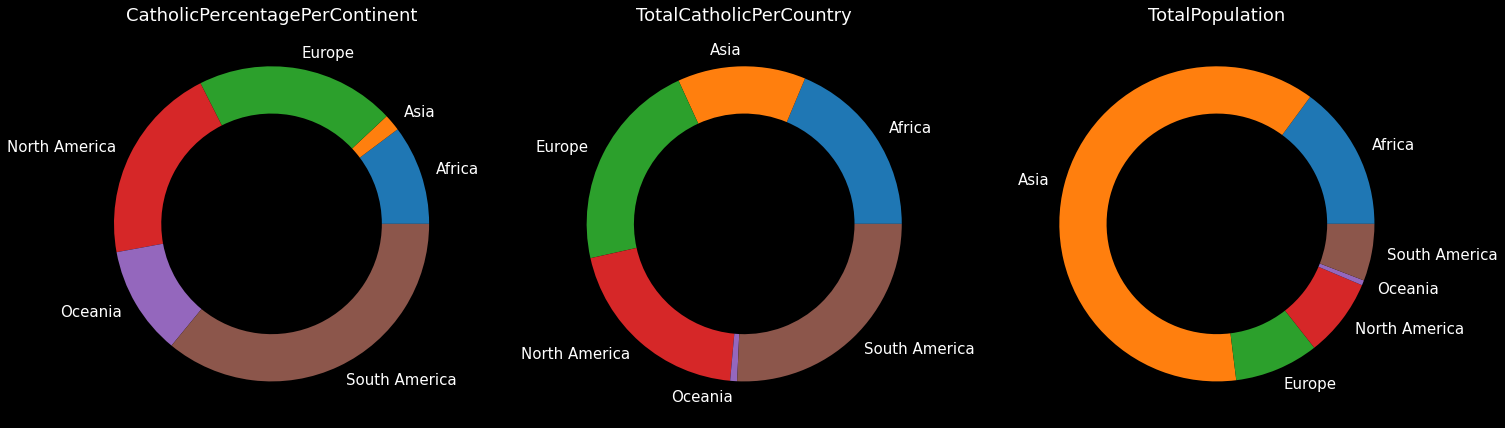

In [47]:
# make a new dataframe for plotting
donut = continents.groupby(['Continent']).sum()

fig, axes = plt.subplots(1,3, figsize=(24,8))

#set text color to white
plt.rcParams.update({'text.color' : 'white',
                   'font.size': 15})

#sets the background color
fig.patch.set_facecolor('black')

for ax, col in zip(axes, donut.columns):
    ax.pie(donut[col], wedgeprops=dict(width=0.3), labels=donut.index)
    ax.set(aspect='equal', title=col)


> #### ☝️my favorite chart so far 😍😊🔥
> #### we can visually compare from the donut plots the values of each continents by category
>
> * **South America** has the highest Percentage of Catholics and  TotalCatholicPerCountry
> * **Asia** has the biggest population in the world.
***

## What 20 Countries has the most percentage of Catholics?

In [48]:
catholic_df = new_df[['Country', 'CatholicPercentagePerCountry', 'TotalPopulation', 'TotalCatholicPerCountry','Continent']]
highest_Percentage_country = catholic_df.sort_values(by='CatholicPercentagePerCountry', ascending=False).head(20)
highest_Percentage_country_bg = highest_Percentage_country.set_index('Country')
highest_Percentage_country_bg.style.set_properties(**{'background-color': 'lightgray'}, subset=['CatholicPercentagePerCountry'])

,CatholicPercentagePerCountry,TotalPopulation,TotalCatholicPerCountry,Continent
Country,,,,
Vatican City,100.000000,842,842,Europe
East Timor,96.869070,1054000,1021000,Asia
San Marino,90.498462,32500,29412,Europe
Paraguay,88.235294,6800000,6000000,South America
Andorra,88.200000,70000,61740,Europe
Portugal,88.000000,10500000,9240000,Europe
Equatorial Guinea,87.037037,1620000,1410000,Africa
Croatia,86.303286,4284889,3698000,Europe
Poland,85.723192,38496000,33000000,Europe


#### or to get the #1 on the list by using _nlargest() _function:

In [49]:
highest_country = catholic_df.nlargest(1, 'CatholicPercentagePerCountry')
highest_country

,Country,CatholicPercentagePerCountry,TotalPopulation,TotalCatholicPerCountry,Continent
188,Vatican City,100.0,842,842,Europe


> #### **Vatican City**, has 100%  

<Figure size 1080x576 with 0 Axes>

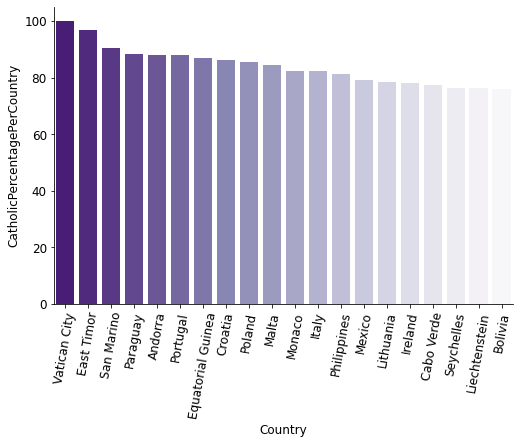

In [50]:
#plotting the result....
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 12})
g = sns.catplot(x = 'Country', y = 'CatholicPercentagePerCountry', data = highest_Percentage_country, kind='bar', 
                palette='Purples_r', aspect =1.5, height =5)
# aspect  and height controls the length and height/width of the bar respectively
g.set_xticklabels(rotation=80)

#### and the 20 countries on with the least percentage are:

In [51]:
least_percentage = catholic_df.sort_values(by='CatholicPercentagePerCountry', ascending=True).head(20)
least_percentage_bg = least_percentage.set_index('Country')
least_percentage_bg.style.set_properties(**{'background-color': 'lightgrey'}, subset=['CatholicPercentagePerCountry'])

,CatholicPercentagePerCountry,TotalPopulation,TotalCatholicPerCountry,Continent
Country,,,,
Afghanistan,0.000334,29928987,100,Asia
Somalia,0.001164,8591629,100,Africa
"Korea, North",0.009999,22912177,2291,Asia
Uzbekistan,0.010000,26851195,2685,Asia
Turkmenistan,0.010526,4750000,500,Asia
Tajikistan,0.013960,7163506,1000,Asia
Yemen,0.019998,20727063,4145,Asia
Iran,0.019999,68017860,13603,Asia
Maldives,0.022916,349106,80,Asia


## What is the Total Number of Catholics around the world?

In [52]:
totalCatholicsGlobal = new_df.TotalCatholicPerCountry.sum()
totalCatholicsGlobal

1130156675

> There are **1,130,156,675
 or 1.1 billion** Catholics around the world according to the data collected in this analysis. 
>
> But, according to [Wikipedia](https://en.wikipedia.org/wiki/Catholic_Church_by_country), there are 1.2 billion Catholics around the world. 
>
>
> and, according to [BBC News](https://www.bbc.com/news/world-21443313#:~:text=There%20are%20an%20estimated%201.2,Catholic%20congregations%20in%20recent%20years) in March of 2013:
>
>> _"There are an estimated 1.2 billion Roman Catholics in the world, according to Vatican figures. More than 40% of the world's Catholics live in Latin America - but Africa has seen the biggest growth in Catholic congregations in recent years."_
>
> Probable reasons for the difference in outcome: 
>    * some of the dependent territories (eg. US Virgin Islands, Hongkong, Macau) wasn't included in the dataset collected
>    * how current were the dataset
>    * other factors like migration

## What is the Overall Percentage of Catholics Around the World?

In [53]:
percentCatholicsGlobal = (totalCatholicsGlobal / new_df.TotalPopulation.sum()) * 100
percentCatholicsGlobal

15.762136992871442

> #### there's 15.8% of Catholic Around the World

***

# Inferences and Conclusion

### TODO


> ### we need to take into consideration factors in determining the rankings and results gathered in this analysis
> * a country of a smaller size may have a smaller number as opposed to other big countries but then it may have a higher percentage
> * a country where a religion is predominantly not Catholic will most likely yield a lower output regardless the size of the region
>
> ### the following illations have been made:
>
> * of the 20 countries with the _highest Catholic Population Around the World_:
>    * **Brazil, Mexico and the Philippines** made the top 3 with **Brazil** having the highest number of Catholics around the world!
>    *  **India, United States and Brazil** topped the list of Countries with  TotalPopulations of 100,000,000 and up
>
>
> * **Philippines, Mexico, Brazil, Democratic Republic of Congo, GErmany, United States, Nigeria, and India** can all be found in the 20 countries with Highest Total Catholics per Country and 20 most Populated Country lists.
>
>
> <img src="https://www.vatican.va/news_services/press/img/ss_scv/insigne/scv_sigillo.gif"
style="width:180px;  float: right; margin: 0px 180px 0px 0px;"></img>
>
> * With regards to _rankings by Continent_: 
>     * **Asia** is the most Populated Continent
>     * **South America** has the highest Percentage of Catholics and is the most Catholic Populated Continent
>
> * There are approximately 1.1 billion Catholics around the World with an approximate 15.8% of Catholics globally
>
> * **and not surprisingly, [Vatican City](http://www.vatican.va/content/vatican/en.html) contains the highest percentage of Catholics around the world!**


***


# References and Future Work

### TODO


### References:


> - **Wikipedia**
>    - **[Catholic Church by Country](https://en.wikipedia.org/wiki/Catholic_Church_by_country)**
>    - **[List of countries by continents](https://simple.wikipedia.org/wiki/List_of_countries_by_continents)**
> - **[Kaggle Dataset](https://www.kaggle.com/mathurinache/catholic-church-by-country)** from Mathurin Aché
>
> - **[World Atlas](https://www.worldatlas.com/cntycont.htmM)** Countries listed by Continent
>
> - **[Markdown Guide](https://www.markdownguide.org)** 
>
> - **[Pandas User Guide]( https://pandas.pydata.org/docs/user_guide/index.html)**
>
> - **[Matplotlib User Guide](https://matplotlib.org/3.3.1/users/index.html)**
>
> - **[Seaborn Gallery](https://seaborn.pydata.org/examples/index.html/)**
>
> - **[Python Graph Gallery](https://python-graph-gallery.com/donut-plot/)** Donut Plot
>
> - **[Stackoverflow](https://stackoverflow.com/)**
>
> - **[RealPython](https://realpython.com/)**
>
> - **[w3schools](https://www.w3schools.com/)**
>
> - **[geeksforgeeks](https://www.geeksforgeeks.org/)**
>
> - **[KGP Talkie](https://www.youtube.com/c/KGPTalkie)** Seaborn|Matplotlib tutorials
>
> - **[Corey Schafer](https://www.youtube.com/c/Coreyms)** Python tutorials
>
> - **images**
    - **[Vatican City Flag by Promex](https://www.crossed-flag-pins.com/animated-flag-gif/flags-Vatican-City.html)**
    - **[Vatican City Seal](https://www.vatican.va/news_services/press/img/ss_scv/insigne/scv_sigillo.gif)**
> - **Special Thanks to:**
>
>    - **[Aakash N S](https://www.linkedin.com/in/aakashns/)** our Instructor
>
>    - **[JovianML](https://jovian.ml/)** for hosting **[Data Analysis with Python: Zero to Pandas](https://jovian.ml/learn)**
>
>    - **[freecodecamp.org](https://www.freecodecamp.org/)**
>

### Future Work:
* datasets analysis of Catholic Saints!